# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None  
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold
from sklearn import preprocessing

# 2. Collect and load data

In [3]:
b=pd.read_csv('bigcity.csv')

In [4]:
b.rename( columns={'Unnamed: 0' :'City_name'}, inplace=True ) 

In [5]:
b.head()

,City_name,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3. Explore numeric variables - five number summary

In [6]:
b.describe()

,City_name,u,x
count,49.000000,49.000000,49.000000
mean,25.000000,103.142857,127.795918
std,14.288690,104.405061,123.121211
min,1.000000,2.000000,46.000000
25%,13.000000,43.000000,58.000000
50%,25.000000,64.000000,79.000000
75%,37.000000,120.000000,130.000000
max,49.000000,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

##### 3a. Visualize numeric variables in boxplot and histograms

<AxesSubplot:xlabel='u'>

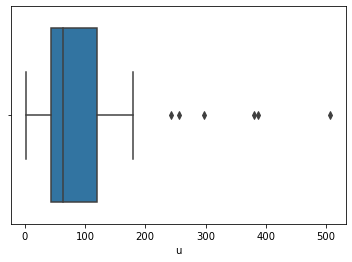

In [7]:
sns.boxplot(b['u'])

<AxesSubplot:xlabel='x'>

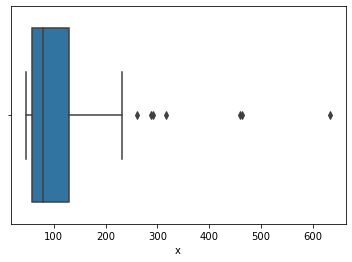

In [8]:
sns.boxplot(b['x'])

<AxesSubplot:xlabel='u', ylabel='Count'>

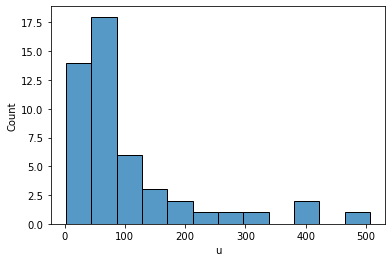

In [9]:
sns.histplot(b['u'])

<AxesSubplot:xlabel='x', ylabel='Count'>

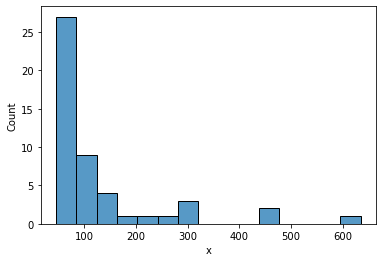

In [10]:
sns.histplot(b['x'])

##### 3b. Measure spread – variance and standard deviation

In [11]:
b.var()

City_name     204.166667
u           10900.416667
x           15158.832483
dtype: float64

In [12]:
b.std()

City_name    14.288690
u           104.405061
x           123.121211
dtype: float64

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

<AxesSubplot:xlabel='u', ylabel='x'>

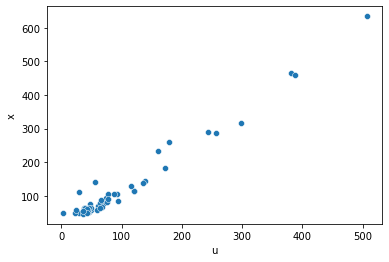

In [13]:
sns.scatterplot(b['u'],b['x'])

In [14]:
# From the above plot, we can see that there is a positive linear correlation between two features,
# with potential outliers

In [15]:
pd.crosstab(b['City_name'],[b['u'],b['x']])

u         2   23  25  29  30  36      37  38  40      43      44  45  46       \
x         50  48  57  50  111 46  54  63  52  60  64  50  61  58  53  53  65    
City_name                                                                       
1           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6           0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
7           0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
8           0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9           0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
10          1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
11          0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
12          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
13          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
14          0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
15          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
16          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
18          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
19          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
21          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
22          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
23          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
24          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
25          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
26          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
27          0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
28          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
29          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
30          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
31          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
32          0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
33          0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
34          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
35          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
36          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
37          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
38          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
39          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
40          0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
41          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
42          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
43          0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
44          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
45          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
46          0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
47          0   0   0   0   0  

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [18]:
b.shape

(49, 3)

In [19]:
x=b['u']
y=b['x']

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [20]:
b.isnull().sum()

City_name    0
u            0
x            0
dtype: int64

In [21]:
b.corr()

,City_name,u,x
City_name,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [22]:
xtrian,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
print(xtrian.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(39,)
(10,)
(39,)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [24]:
xc=sm.add_constant(xtrian)
m1=sm.OLS(ytrain, xc).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1028.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.33e-28
Time:                        16:41:05   Log-Likelihood:                -179.77
No. Observations:                  39   AIC:                             363.5
Df Residuals:                      37   BIC:                             366.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5712      5.643      1.696      0.0

In [25]:
m1.params

const   9.571154
u       1.164655
dtype: float64

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

NameError: name 'y_pred' is not defined

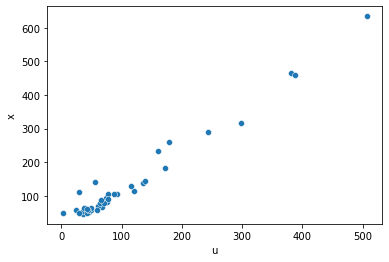

In [26]:
sns.scatterplot(xtrian, ytrain)
sns.lineplot(xtrian, y_pred, color='r')

In [27]:
y_pred= m1.predict(xc)

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [28]:
mse=mean_squared_error(ytrain,m1.predict())
rmse=np.sqrt(mse)
print('mse', mse)
print('rmse', rmse)
r_square= m1.rsquared
print('r-square', r_square)

mse 590.4792478727476
rmse 24.29977876180661
r-square 0.9652735334606501


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [164]:
print(r_square)

0.9652735334606501


In [ ]:
xa=sm.add_constant(xtest)

In [167]:
y_pred_test=m1.predict(xa)

In [169]:
mse2=mean_squared_error(ytest, y_pred_test)
rmse2= np.sqrt(mse)
mse2, rmse2

(350.090440198869, 18.710703893730695)

In [173]:
print('model 1 bias error:', rmse)
print('model 2 bias error:',rmse2)

model 1 bias error: 24.29977876180661
model 2 bias error: 18.710703893730695


In [175]:
print('Varaince error:', rmse - rmse2)

Varaince error: 5.589074868075915
